## Work
1. 請建立自己的deep neural network
2. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
3. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

train, test = cifar10.load_data()

In [3]:
from tensorflow.keras.utils import to_categorical

# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [4]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers

def build_mlp():
    input_layer = Input([x_train.shape[-1]])
    x = Dense(units=512, activation="relu")(input_layer)
    x = Dense(units=256, activation="relu")(x)
    x = Dense(units=128, activation="relu")(x)
    out = Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp()
model.summary()

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="Adam")

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model.fit(x_train, y_train, 
                    epochs=500, 
                    batch_size=256, 
                    validation_data=(x_test, y_test), 
                    shuffle=True)

Epoch 1/500
196/196 [==============================] - 3s 12ms/step - loss: 1.9296 - accuracy: 0.3033 - val_loss: 1.7886 - val_accuracy: 0.3614
Epoch 2/500
196/196 [==============================] - 2s 12ms/step - loss: 1.7092 - accuracy: 0.3912 - val_loss: 1.6227 - val_accuracy: 0.4213
Epoch 3/500
196/196 [==============================] - 2s 13ms/step - loss: 1.6182 - accuracy: 0.4253 - val_loss: 1.5584 - val_accuracy: 0.4446
Epoch 4/500
196/196 [==============================] - 3s 13ms/step - loss: 1.5516 - accuracy: 0.4464 - val_loss: 1.5047 - val_accuracy: 0.4597
Epoch 5/500
196/196 [==============================] - 2s 11ms/step - loss: 1.5130 - accuracy: 0.4599 - val_loss: 1.4955 - val_accuracy: 0.4680
Epoch 6/500
196/196 [==============================] - 2s 11ms/step - loss: 1.4621 - accuracy: 0.4800 - val_loss: 1.4621 - val_accuracy: 0.4776
Epoch 7/500
196/196 [==============================] - 2s 12ms/step - loss: 1.4274 - accuracy: 0.4911 - val_loss: 1.4664 - val_accuracy:

In [6]:
# 獲取最終的驗證損失和驗證準確度
val_loss = history.history['val_loss'][-1]
val_acc = history.history['val_accuracy'][-1]

print(f'Final Validation Loss: {val_loss}')
print(f'Final Validation Accuracy: {val_acc}')

Final Validation Loss: 7.980311870574951
Final Validation Accuracy: 0.4959000051021576


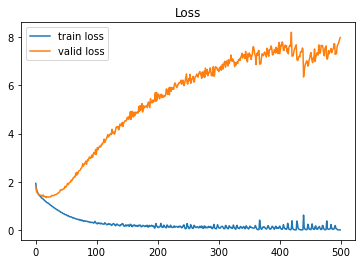

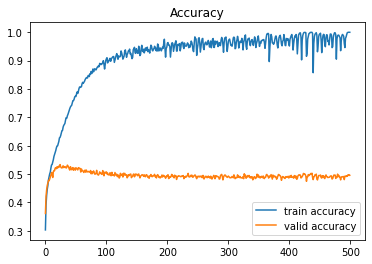

In [7]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## 筆記
### Adam 500 epochs
* Validation Loss = 7.980311870574951
* Validation Accuracy = 0.4959000051021576

### SGD 500 epochs
* Validation Loss = 3.1998491287231445
* Validation Accuracy = 0.5436000227928162